### Import the packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [5]:
df.shape

(142846, 12)

In [6]:
times = pd.DatetimeIndex(df['starttime'])

In [7]:
times.dayofweek

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [9]:
df["dayofweek"] = times.dayofweek
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,dayofweek
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,0


In [10]:
groupby_day_from = df.groupby(["dayofweek", "from_station_id"]).size()
groupby_day_to = df.groupby(["dayofweek", "to_station_id"]).size()
df_diff = pd.DataFrame({'From_Count': groupby_day_from.sort_index(), 'To_Count': groupby_day_to.sort_index()})
df_diff["Difference"] = df_diff.From_Count - df_diff.To_Count
df_diff["Diff_Average"] = df_diff.Difference / 52

### Create a dataframe with station counts averages by day-of-week

In [11]:
d = {"Monday":df_diff.loc[0]["Diff_Average"], "Tuesday":df_diff.loc[1]["Diff_Average"],
     "Wednesday":df_diff.loc[2]["Diff_Average"], "Thursday":df_diff.loc[3]["Diff_Average"],
     "Friday":df_diff.loc[4]["Diff_Average"], "Satursday":df_diff.loc[5]["Diff_Average"],
     "Sunday":df_diff.loc[6]["Diff_Average"]}
avg_diff = pd.concat(d, axis=1)
col_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Satursday", "Sunday"]
avg_diff = avg_diff[col_name]

In [12]:
avg_diff.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Satursday,Sunday
BT-01,0.346154,1.000000,-0.346154,0.173077,1.365385,0.000000,-0.903846
BT-03,0.846154,1.519231,1.865385,3.019231,3.596154,3.211538,1.576923
BT-04,1.134615,1.134615,0.826923,1.615385,1.211538,0.365385,0.730769
BT-05,-0.211538,-0.134615,-0.500000,-1.057692,0.269231,-0.019231,-0.096154
CBD-03,-2.923077,-2.788462,-3.423077,-2.500000,-3.346154,-2.634615,-1.326923


### A Function to Plot a Bar Chart

In [17]:
def plot_oneBar(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if "xlabel" in opts:
      plt.xlabel(opts["xlabel"])
    if "ylabel" in opts:
      plt.ylabel(opts["ylabel"])
    if "xticks" in opts and opts["xticks"]:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ["" for x in df.index]
      plt.xticks(index, labels) 
    if "ylim" in opts:
      plt.ylim(opts["ylim"])
    if "title" in opts:
      plt.title(opts["title"])

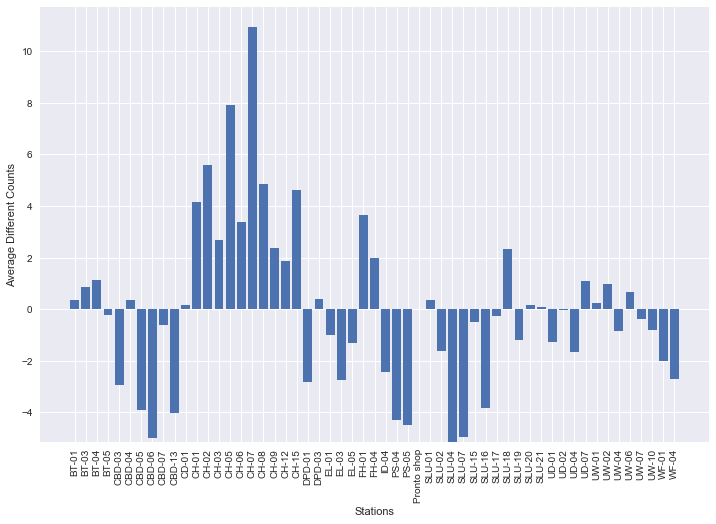

In [18]:
fig = plt.figure(figsize=(12, 8))  # Controls global properties of the bar plot
opts = {"xlabel": "Stations", "ylabel": "Average Different Counts", "xticks": True}
plot_oneBar(avg_diff, "Monday", opts)

### A Function to Plot n Bar Charts

In [26]:
def plot_nBar(df, columns, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_columns = len(columns)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for column in columns:
        idx += 1
        local_opts["xticks"] = False
        local_opts["xlabel"] = ""
        if idx == num_columns:
          local_opts["xticks"] = True
          local_opts["xlabel"] = opts["xlabel"]
        local_opts["title"] = column
        plt.subplot(num_columns, 1, idx)
        plot_oneBar(df, column, local_opts)

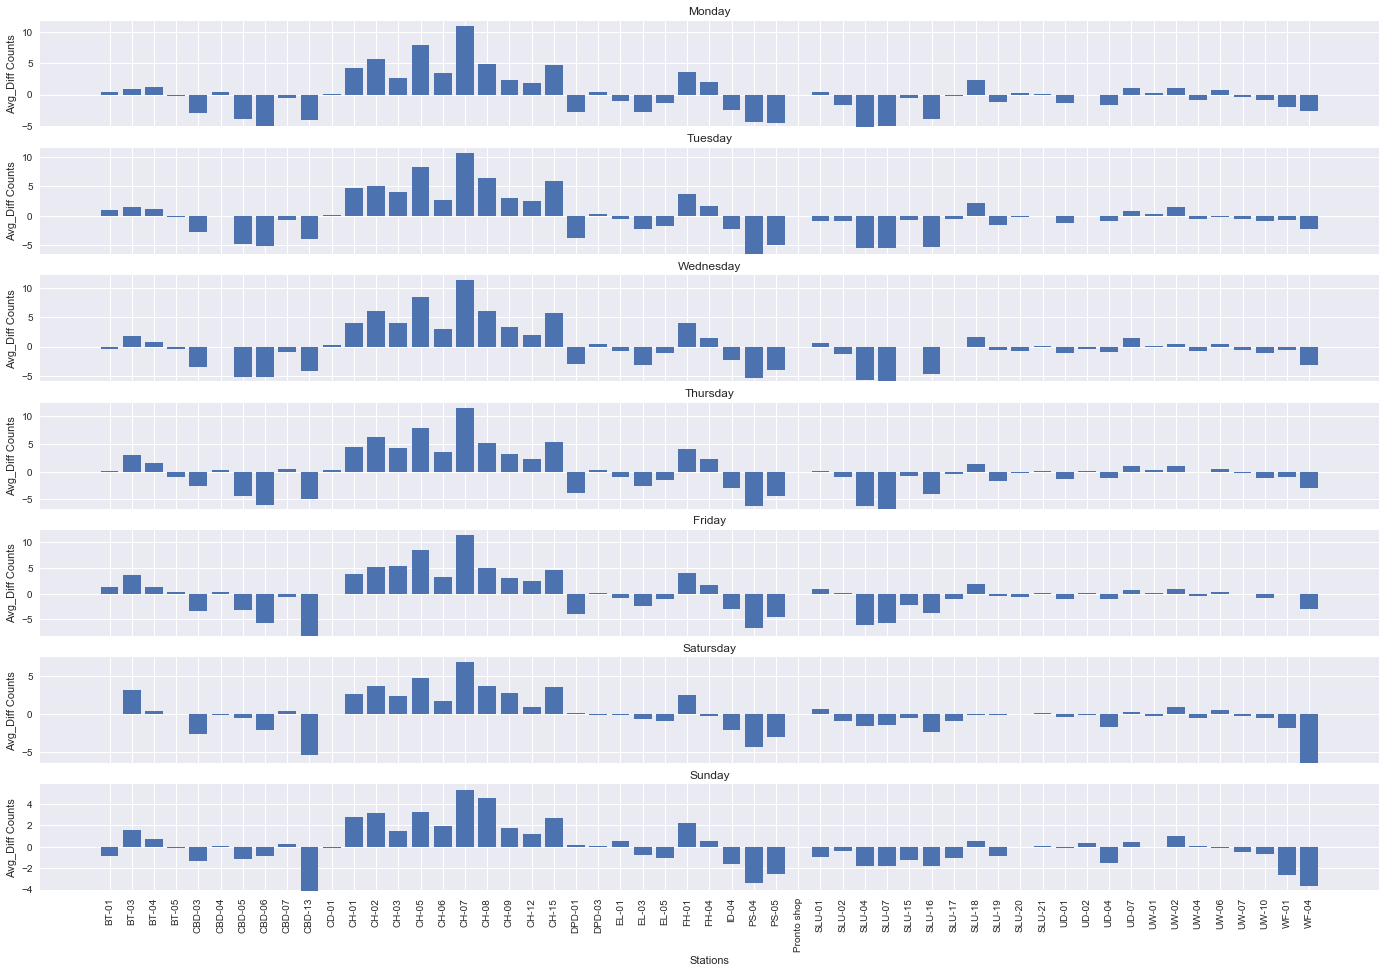

In [27]:
fig = plt.figure(figsize=(24, 16))  # Controls global properties of the bar plot
opts = {"xlabel": "Stations", "ylabel": "Avg_Diff Counts"}
plot_nBar(avg_diff, col_name, opts)